In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import cftime

import numpy as np
import matplotlib.pyplot as plt
import cftime
import matplotlib.cm as cm
from cmap import Colormap
import seaborn as sns

In [2]:
path = "/pub/mariant3/WarmWaterMasses/"
metrics = xr.open_dataset(f"{path}data/mhwMetrics.nc")

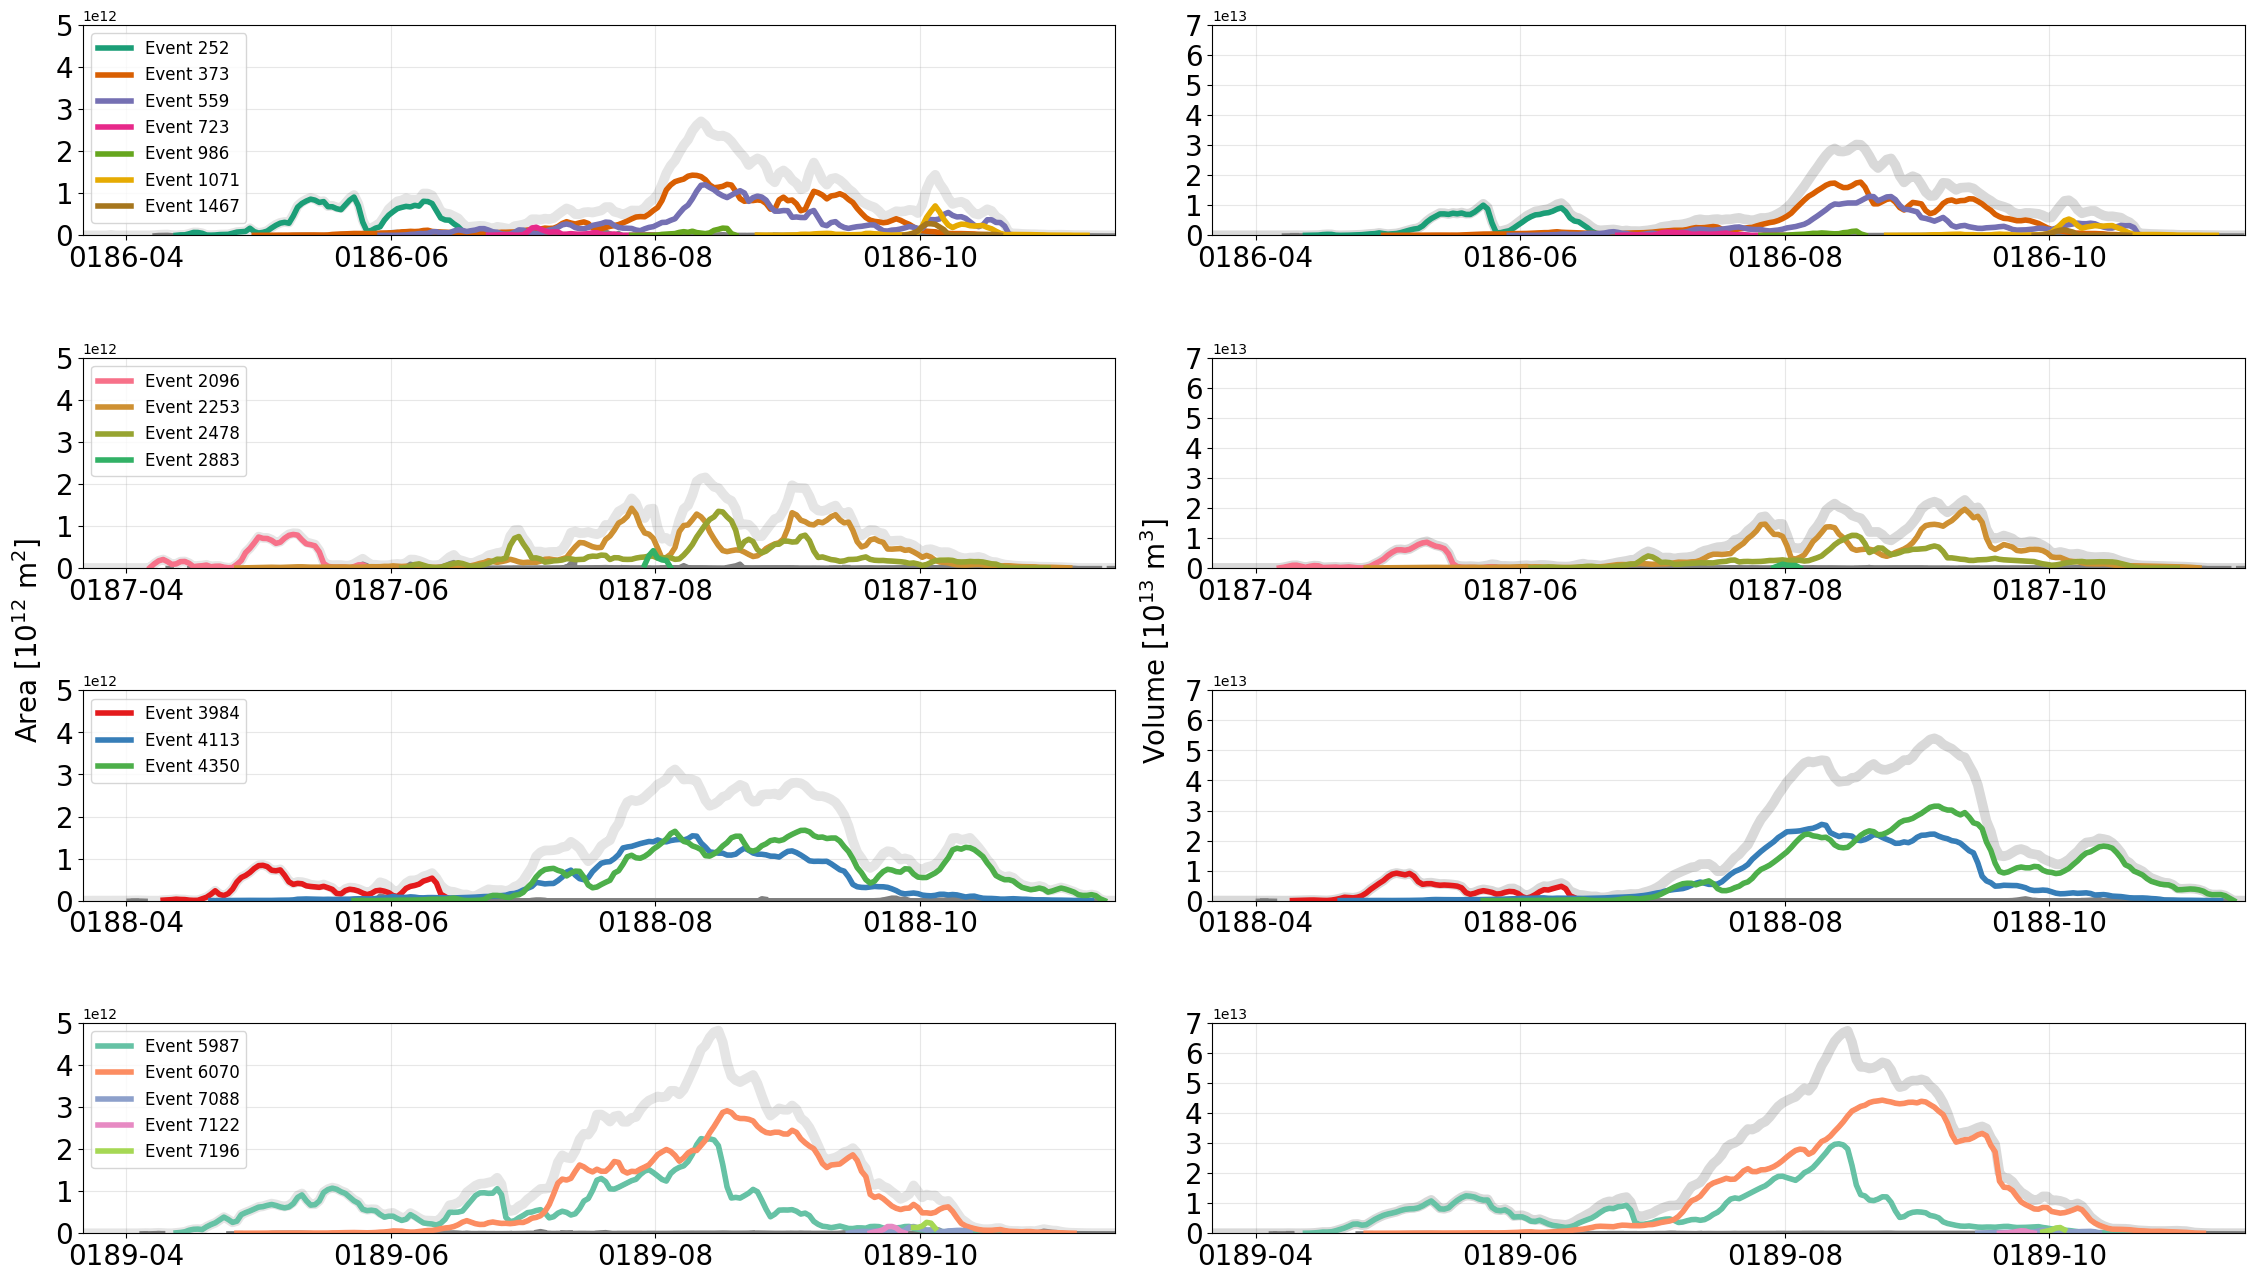

In [3]:
fontsize = 20
years = ['0186', '0187', '0188', '0189']
fig, axs = plt.subplots(len(years), 2, figsize=(24, 3.5 * len(years)))

# Generate unique colors based on the number of MHWs
big_events = metrics.event_area.where(metrics.event_area > 0.15e12, drop=True).mhw
num_mhws = len(metrics.mhw)

# colors = sns.color_palette("husl", n_colors=len(big_events))
# colors = cm.tab20(np.linspace(0, 1, len(big_events)))

color_sets = {
    '0186': sns.color_palette("Dark2", n_colors=8),
    '0187': sns.color_palette("husl", n_colors=8),
    '0188': sns.color_palette("Set1", n_colors=4),
    '0189': sns.color_palette("Set2", n_colors=8)
}

for i, year in enumerate(years):
    year_start = f'{year}-03-22'
    year_end = f'{year}-11-15'
    ##
    areas = metrics.sum('mhw').event_area
    volumes = metrics.sum('mhw').event_volume
    areas.plot(ax=axs[i,0], linewidth=7, color="k", alpha=0.1)
    for j, mhw in enumerate(metrics.mhw):
        area = metrics.sel(mhw=mhw, time=year).event_area
        area.plot(ax=axs[i,0], alpha=1, linewidth=3, color='gray')
    
    # Get just the big events for this year
    year_big_events = metrics.sel(time=year).event_area.where(metrics.sel(time=year).event_area > 0.15e12, drop=True).mhw
    
    for j, mhw in enumerate(year_big_events):
        big_areas = metrics.sel(mhw=mhw, time=year).event_area
        big_areas.plot(ax=axs[i,0], alpha=1, linewidth=4, color=color_sets[year][j], label=f'Event {mhw.values}')
    
    ##
    volumes.sel(time=year).plot(ax=axs[i,1], label="Volume", linewidth=7, color="k", alpha=0.15)
    for j, mhw in enumerate(metrics.mhw):
        volume = metrics.sel(mhw=mhw, time=year).event_volume
        volume.plot(ax=axs[i,1], alpha=1, linewidth=3, color='gray')
    
    for j, mhw in enumerate(year_big_events):
        big_volumes = metrics.sel(mhw=mhw, time=year).event_volume
        big_volumes.plot(ax=axs[i,1], alpha=1, linewidth=4, color=color_sets[year][j])
        
    
    for j in range(2):
        axs[i,j].set_xlim(
            cftime.DatetimeNoLeap(int(year), 3, 22),
            cftime.DatetimeNoLeap(int(year), 11, 15)
        )
        axs[i,j].tick_params(axis='both', labelsize=fontsize)
        axs[i,j].grid(True, alpha=0.3)
        axs[i,j].set_xlabel("")
        axs[i,j].set_ylabel("")
        axs[i,j].set_title("")

    # Set specific tick marks for Area plot
    axs[i,0].set_yticks(np.arange(0, 6e12, 1e12))
    axs[i,0].set_ylim(0, 5e12)

    # Set specific tick marks for Volume plot
    axs[i,1].set_yticks(np.arange(0, 8e13, 1e13))
    axs[i,1].set_ylim(0, 7e13)

    axs[i,0].legend(loc='upper left', fontsize=12)
    # axs[i,1].legend(loc='upper left', fontsize=fontsize-4)

fig.text(0.04, 0.5, r"Area [10$^{12}$ m${^2}$]", va='center', rotation='vertical', fontsize=fontsize)
fig.text(0.51, 0.5, r"Volume [10$^{13}$ m${^3}$]", va='center', rotation='vertical', fontsize=fontsize)
plt.tight_layout(rect=[0.03, 0, 1, 1], pad=5)
# plt.savefig(f"/pub/mariant3/WarmWaterMasses/figures/area-volume-timeseries.png",dpi=300,bbox_inches="tight")
plt.show()

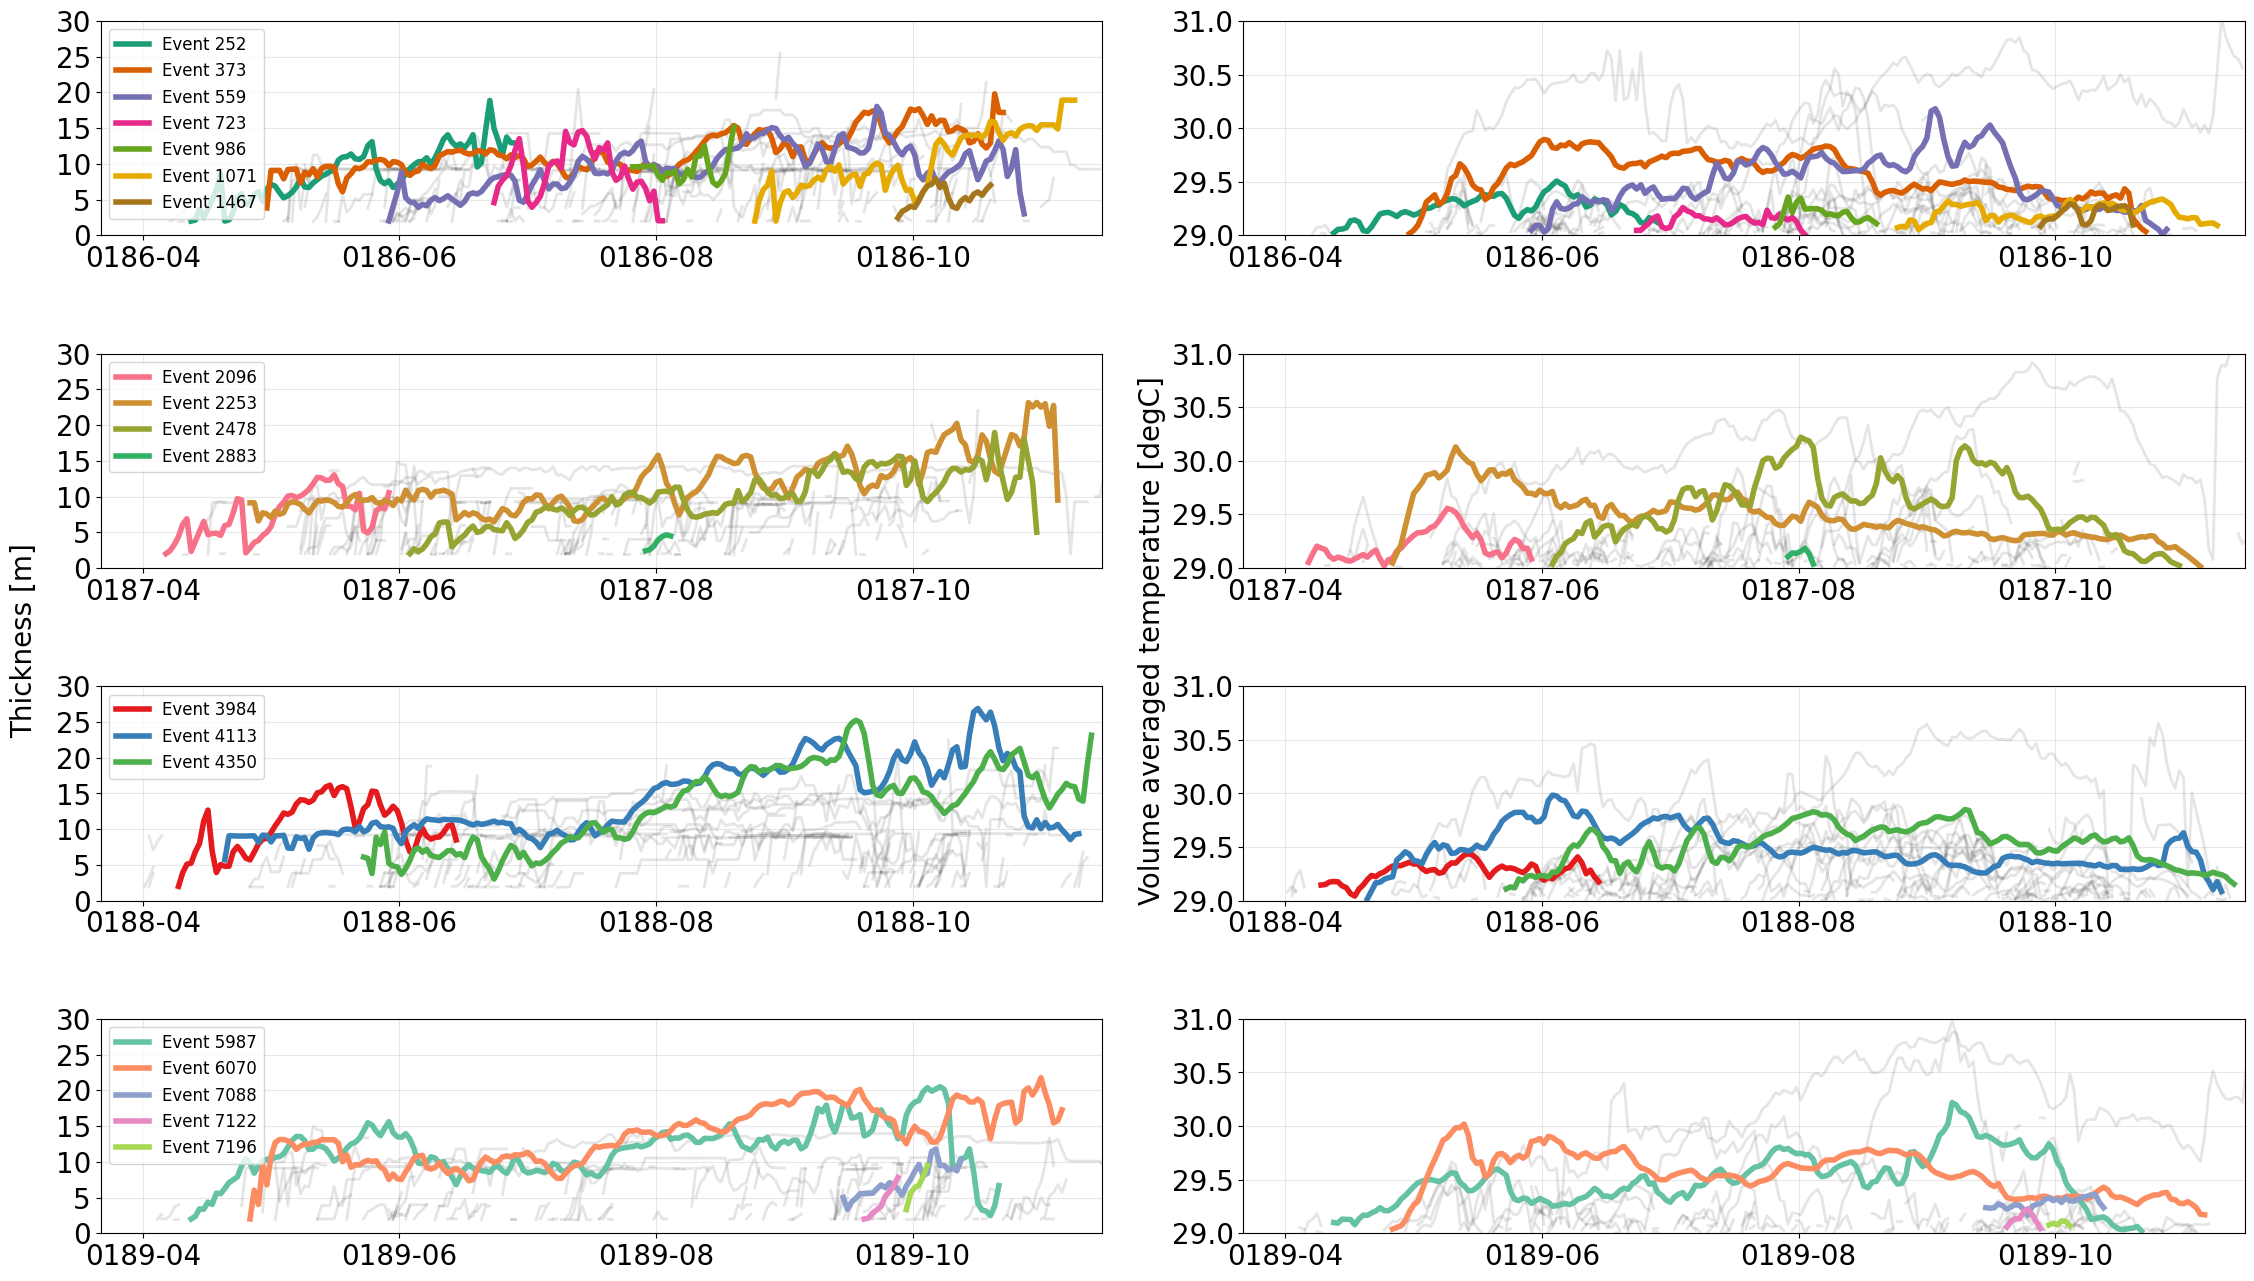

In [4]:
fontsize = 20
years = ['0186', '0187', '0188', '0189']
fig, axs = plt.subplots(len(years), 2, figsize=(24, 3.5 * len(years)))

# Generate unique colors based on the number of MHWs
big_events = metrics.event_area.where(metrics.event_area > 0.15e12, drop=True).mhw
num_mhws = len(metrics.mhw)

# colors = sns.color_palette("husl", n_colors=len(big_events))
# colors = cm.tab20(np.linspace(0, 1, len(big_events)))

color_sets = {
    '0186': sns.color_palette("Dark2", n_colors=8),
    '0187': sns.color_palette("husl", n_colors=8),
    '0188': sns.color_palette("Set1", n_colors=4),
    '0189': sns.color_palette("Set2", n_colors=8)
}

for i, year in enumerate(years):
    year_start = f'{year}-03-22'
    year_end = f'{year}-11-15'
    ##

    for j, mhw in enumerate(metrics.mhw):
        thickness = metrics.sel(mhw=mhw, time=year).event_thickness
        thickness.plot(ax=axs[i,0], linewidth=2, color="k", alpha=0.1)
    
    # Get just the big events for this year
    year_big_events = metrics.sel(time=year).event_area.where(metrics.sel(time=year).event_area > 0.15e12, drop=True).mhw
    
    for j, mhw in enumerate(year_big_events):
        big_thickness = metrics.sel(mhw=mhw, time=year).event_thickness
        big_thickness.plot(ax=axs[i,0], alpha=1, linewidth=4, color=color_sets[year][j], label=f'Event {mhw.values}')
    
    ##
    for j, mhw in enumerate(metrics.mhw):
        T = metrics.sel(mhw=mhw, time=year).volcello_weighted_thetao
        T.plot(ax=axs[i,1], linewidth=2, color="k", alpha=0.1)
    
    for j, mhw in enumerate(year_big_events):
        big_T = metrics.sel(mhw=mhw, time=year).volcello_weighted_thetao
        big_T.plot(ax=axs[i,1], alpha=1, linewidth=4, color=color_sets[year][j])
        
    
    for j in range(2):
        axs[i,j].set_xlim(
            cftime.DatetimeNoLeap(int(year), 3, 22),
            cftime.DatetimeNoLeap(int(year), 11, 15)
        )
        axs[i,j].tick_params(axis='both', labelsize=fontsize)
        axs[i,j].grid(True, alpha=0.3)
        axs[i,j].set_xlabel("")
        axs[i,j].set_ylabel("")
        axs[i,j].set_title("")

    # Set specific tick marks for Area plot
    axs[i,0].set_yticks(np.arange(0, 31, 5))
    axs[i,0].set_ylim(0, 30)

    # Set specific tick marks for Volume plot
    axs[i,1].set_yticks(np.arange(29, 31.1, 0.5))
    axs[i,1].set_ylim(29, 31)

    axs[i,0].legend(loc='upper left', fontsize=12)

fig.text(0.04, 0.5, "Thickness [m]", va='center', rotation='vertical', fontsize=fontsize)
fig.text(0.51, 0.5, r"Volume averaged temperature [degC]", va='center', rotation='vertical', fontsize=fontsize)
plt.tight_layout(rect=[0.03, 0, 1, 1], pad=5)
# plt.savefig(f"/pub/mariant3/WarmWaterMasses/figures/weightedTemp-thickness-timeseries.png",dpi=300,bbox_inches="tight")
plt.show()